In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [47]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [48]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [49]:
df.custcat.value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

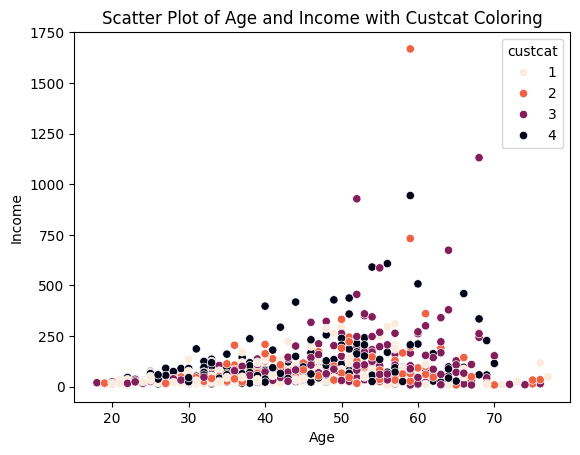

In [50]:
# Scatter plot with 'age' and 'income' on x and y axes, and 'custcat' for coloring
sns.scatterplot(x='age', y='income', hue='custcat', data=df,palette="rocket_r")

# Set plot title and labels
plt.title('Scatter Plot of Age and Income with Custcat Coloring')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

#### sklearn.neighbors.KNeighborsClassifier

1. Pick a value for K.
2. Calculate the distance ( dissimilarity) of unknown case from all cases by methods.
3. Select the K-observations in the training data that are "nearest" to the unknown data point.
4. Predict the response of the unknown data point, using the most popular response value from the K-nearest neighbours.

- For unknown case, first pick K=1 Calculate and make prediction until K=20 Compare results.

    - K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases.
    - K=20 The model becomes overly generalized, if value of K is too high.
    - If we use 2 features (age, income), we are using it in a 2-dimensional space.
    - We can also use the same distance matrix for multi-dimensional vectors.

- For unknown case, first pick K=1
- Calculate and make prediction until K=20
- Compare Results

### Exercise
- Normalize the data : StandardScaler
- Classification : KNeighborsClassifier
- Training: k=4

#### Normalization

In [51]:
# 1 Normalizing & Splitting the Data
# Split the data into features (X) and target (y)
X = df.drop("custcat",axis=1)
y = df["custcat"]

# from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fitting and Evaluating the Model

- We are now ready to train the model. For this, we’ll use a fixed value of 4 for k.
- We first create an instance of the kNN model, then fit this to our training data. We pass both the features and the target variable, so the model can learn.


In [52]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [53]:
""" 
The model is now trained! We can make predictions on the test dataset, which we can use later to score the model.
"""



' \nThe model is now trained! We can make predictions on the test dataset, which we can use later to score the model.\n'

In [54]:
y_pred = knn.predict(X_test)

#### Accuracy

In [55]:
# from sklearn.metrics import accuracy_score : 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3


#### Using Cross Validation to Get the Best Value of k

In [56]:
k_values = [i for i in range (1,20)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

# from sklearn.model_selection import cross_val_score
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=4)
    scores.append(np.mean(score))

#### Plot

Text(0, 0.5, 'Accuracy Score')

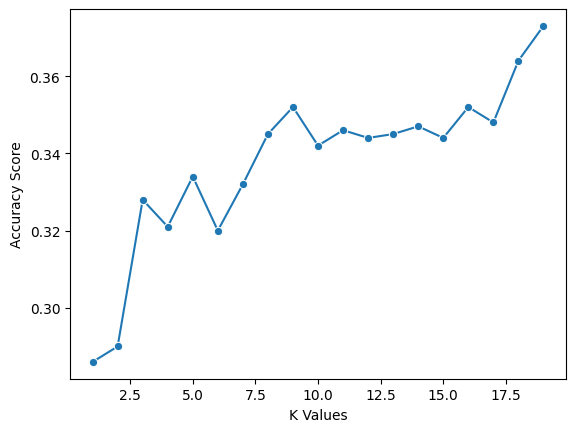

In [57]:
# We can plot the results with the following code
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")